In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import colors
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("export.csv")

In [4]:
df.head()

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
0,31-12-2023,United Kingdom of Great Britain and Northern I...,Radioactive Waste Management,Administrative and Support and Waste Managemen...,Undetermined,Undetermined,Undetermined,Undetermined,Undetermined
1,31-12-2023,Belarus,BelTA,Information,Belarus,Belarusian Cyber-Partisans,Protest,Disruptive,Undetermined
2,30-12-2023,United States of America,Xerox Business Solutions,Administrative and Support and Waste Managemen...,Undetermined,INC Ransom,Financial,Mixed,Exploitation of Application Server
3,30-12-2023,Iran (Islamic Republic of),SnappFood,Accommodation and Food Services,Undetermined,Irleaks,Financial,Mixed,Exploitation of Application Server
4,29-12-2023,Canada,Memorial University of Newfoundland,Educational Services,Undetermined,Undetermined,Financial,Disruptive,Undetermined


In [5]:
# Calculate counts of attacks by date
date_counts = df['Date'].value_counts()

# Map the counts to each row based on the 'Date' column and assign to new column 'Attack_Counts'
df['Attack_Counts'] = df['Date'].map(date_counts)

# Print the first few rows of the modified dataset
print(df.head())

         Date                                           Location  \
0  31-12-2023  United Kingdom of Great Britain and Northern I...   
1  31-12-2023                                            Belarus   
2  30-12-2023                           United States of America   
3  30-12-2023                         Iran (Islamic Republic of)   
4  29-12-2023                                             Canada   

                                Victim  \
0         Radioactive Waste Management   
1                                BelTA   
2             Xerox Business Solutions   
3                            SnappFood   
4  Memorial University of Newfoundland   

                                            Industry Actor Location  \
0  Administrative and Support and Waste Managemen...   Undetermined   
1                                        Information        Belarus   
2  Administrative and Support and Waste Managemen...   Undetermined   
3                    Accommodation and Food Services  

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [7]:

df.head()

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type,Attack_Counts
0,2023-12-31,United Kingdom of Great Britain and Northern I...,Radioactive Waste Management,Administrative and Support and Waste Managemen...,Undetermined,Undetermined,Undetermined,Undetermined,Undetermined,2
1,2023-12-31,Belarus,BelTA,Information,Belarus,Belarusian Cyber-Partisans,Protest,Disruptive,Undetermined,2
2,2023-12-30,United States of America,Xerox Business Solutions,Administrative and Support and Waste Managemen...,Undetermined,INC Ransom,Financial,Mixed,Exploitation of Application Server,2
3,2023-12-30,Iran (Islamic Republic of),SnappFood,Accommodation and Food Services,Undetermined,Irleaks,Financial,Mixed,Exploitation of Application Server,2
4,2023-12-29,Canada,Memorial University of Newfoundland,Educational Services,Undetermined,Undetermined,Financial,Disruptive,Undetermined,1


In [8]:
# Replace null values in the 'Industry' column with 'Finance and Insurance'
df['Industry'].fillna('Finance and Insurance', inplace=True)

# Replace null values in the 'Sub-Type' column with 'Exploitation of End Hosts'
df['Sub-Type'].fillna('Exploitation of End Hosts', inplace=True)


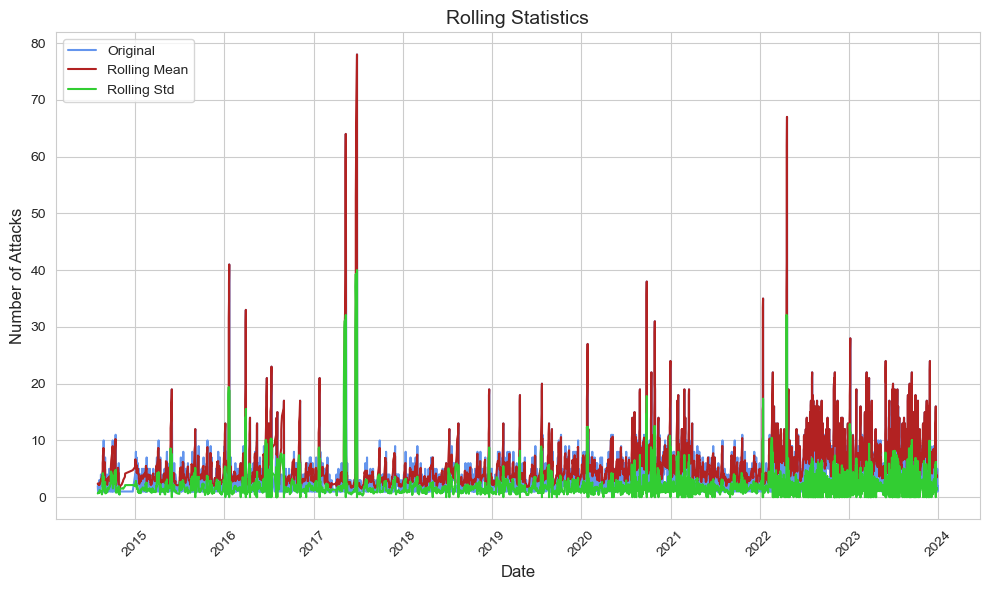

In [9]:
# Calculate rolling mean and standard deviation for 'Attack_Counts'
rolling_mean = df['Attack_Counts'].rolling(window=12).mean()
rolling_std = df['Attack_Counts'].rolling(window=12).std()

# Plot the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Attack_Counts'], color='cornflowerblue', label='Original')
plt.plot(df['Date'], rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(df['Date'], rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size=12)
plt.ylabel('Number of Attacks', size=12)
plt.legend(loc='upper left')
plt.title('Rolling Statistics', size=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [10]:
df = df.set_index("Date")

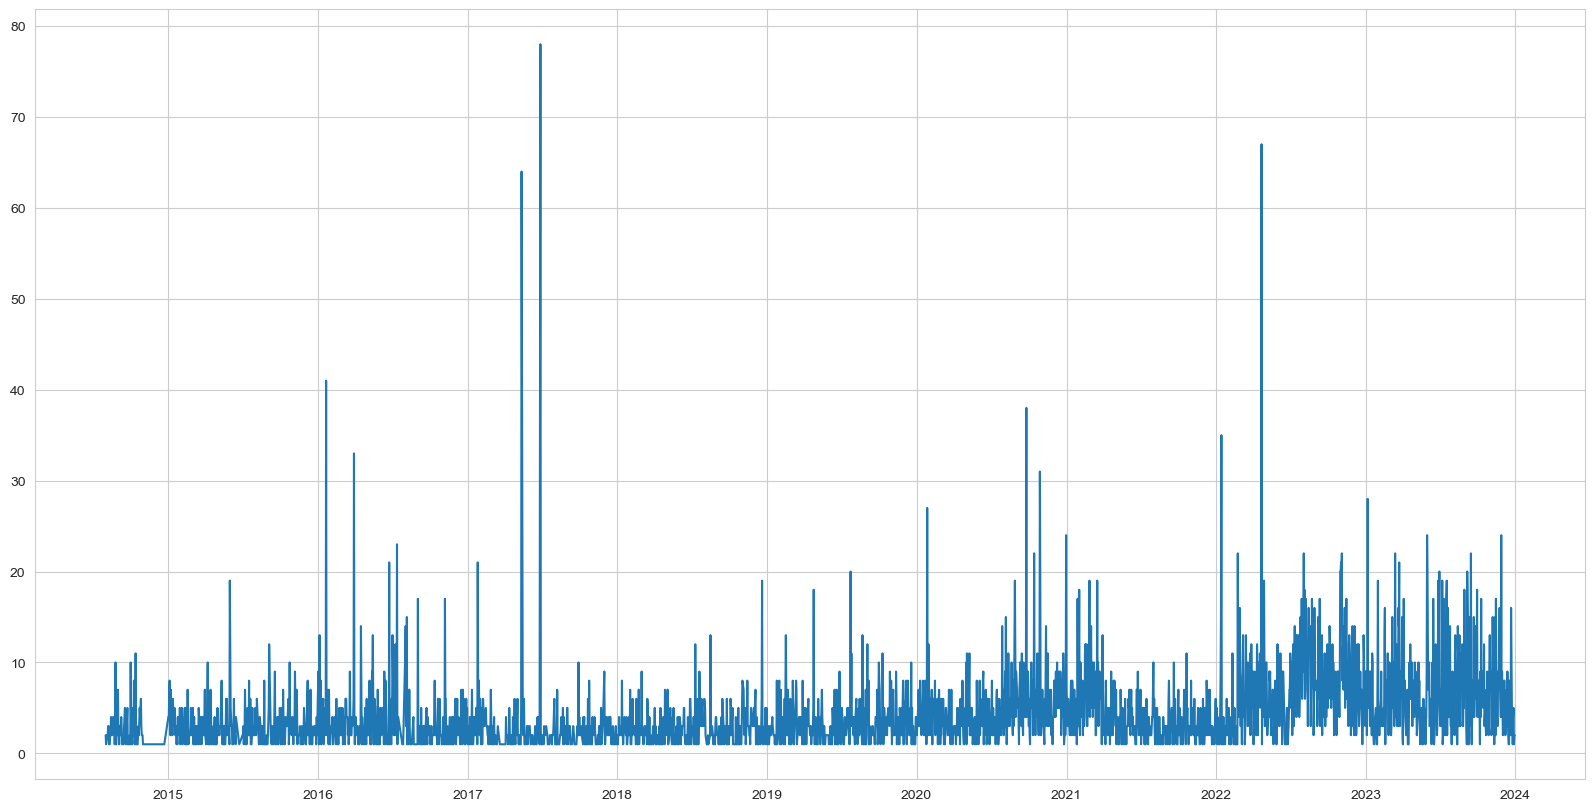

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df["Attack_Counts"], linestyle="-")
plt.xlabel=('Date')
plt.ylabel=('Total Production')
plt.show();

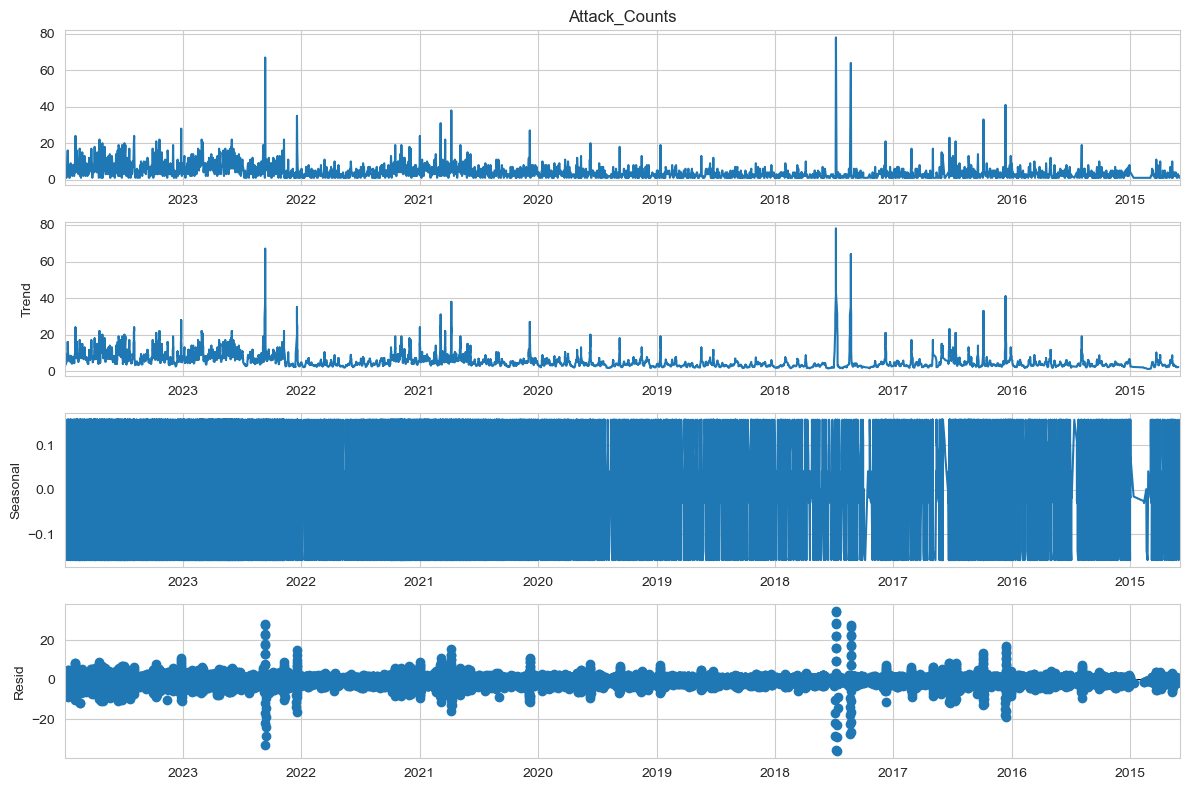

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Set plot size
plt.rcParams['figure.figsize'] = 12, 8

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Attack_Counts'], model='additive', period=12)  # Assuming a yearly seasonal pattern

# Plot the decomposed components
decomposition.plot()
plt.show()

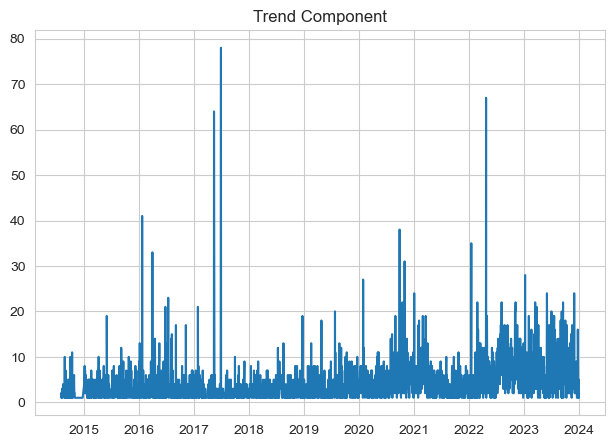

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Set plot size
plt.figure(figsize=(25, 5))

# Perform seasonal decomposition with a period of 1 (assuming no regular frequency)
a = seasonal_decompose(df["Attack_Counts"], model="additive", period=1)


# Plot trend component
plt.subplot(1, 3, 2)
plt.plot(a.trend)
plt.title('Trend Component')

plt.show()


In [14]:

#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Attack_Counts'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.432556e+01
p-value                        1.122267e-26
#Lags Used                     2.000000e+00
Number of Observations Used    1.299700e+04
Critical Value (1%)           -3.430853e+00
Critical Value (5%)           -2.861762e+00
Critical Value (10%)          -2.566888e+00
dtype: float64


In [15]:
# Reset index to make the 'Date' index a regular column
df.reset_index(inplace=True)

# Keep only the 'Date' and 'Attack_Counts' columns
df_subset = df[['Date', 'Attack_Counts']]

# Split the subsetted dataset into training and testing sets
train_data = df_subset.iloc[:len(df_subset) - 12]
test_data = df_subset.iloc[len(df_subset) - 12:]


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [17]:
arima_model = SARIMAX(train_data['Attack_Counts'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                              Attack_Counts   No. Observations:                12988
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood              -30823.844
Date:                                    Sun, 07 Apr 2024   AIC                          61669.688
Time:                                            10:37:46   BIC                          61751.877
Sample:                                                 0   HQIC                         61697.151
                                                  - 12988                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9518      0.013     72.765      0.000       0.926       0.977
ar.L2          0.0145      0.013      1.143      0.253      -0.010       0.040
ma.L1         -0.9991      0.001  -1995.579      0.000      -1.000      -0.998
ar.S.L12       0.4598      2.116      0.217      0.828      -3.688       4.608
ar.S.L24       0.2854      1.216      0.235      0.814      -2.097       2.668
ar.S.L36      -0.2775      0.719     -0.386      0.700      -1.687       1.132
ar.S.L48       0.0023      0.034      0.068      0.946      -0.064       0.068
ma.S.L12      -0.4559      2.116     -0.215      0.829      -4.603       3.691
ma.S.L24      -0.3010      1.209     -0.249      0.803      -2.670       2.068
ma.S.L36       0.2902      0.738      0.393      0.694      -1.155       1.736
sigma2         6.7525      0.013    503.056      0.000       6.726       6.779
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):          28675239.32
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       233.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

12988    3.080297
12989    3.125891
12990    3.232434
12991    3.339258
12992    3.432156
12993    3.524581
12994    3.626178
12995    3.742112
12996    3.838041
12997    3.924625
12998    4.004867
12999    4.091523
Name: ARIMA Predictions, dtype: float64

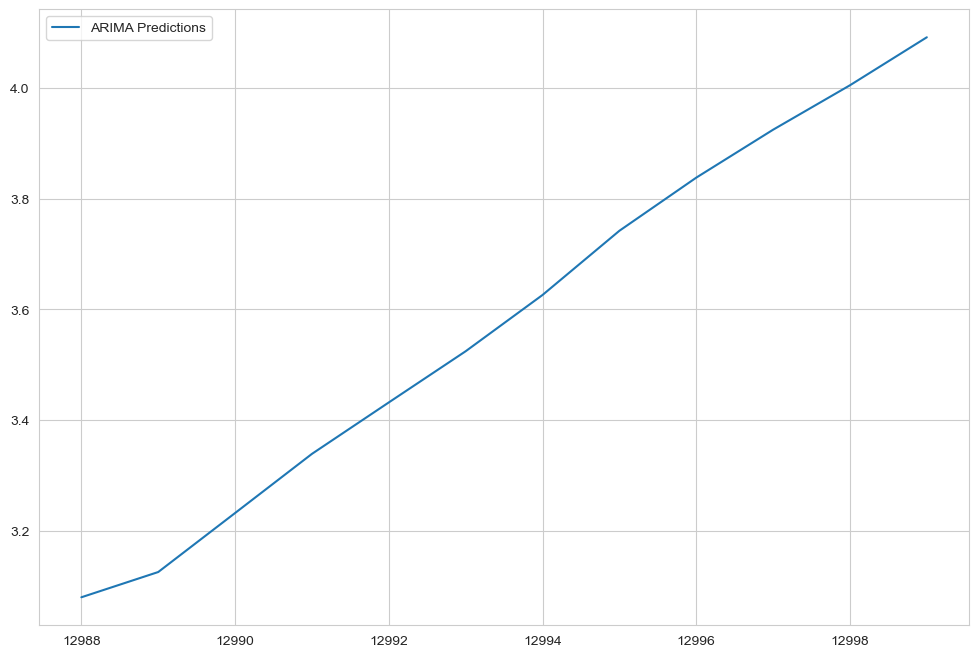

In [19]:
#test_data['Attack_Counts'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [20]:
from statsmodels.tools.eval_measures import rmse

In [21]:
arima_rmse_error = rmse(test_data['Attack_Counts'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Attack_Counts'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 2.392310086187663
RMSE Error: 1.5467094381905293
Mean: 8.811076923076923


In [22]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
